<a href="https://colab.research.google.com/github/jae1001/PartII_C1/blob/main/regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Python using scipy package

Parameter values 1 
[  0.08007729  -0.80303695   3.02896701  -6.1571493    9.63273638
 -12.62802727   9.99976503]
Parameter standard errors 1 
[ 0.0890386   1.07229026  4.92351258 10.73349565 11.22006168  4.95850065
  0.68079056]
Parameter values 2 
[9.05929798 1.09340231 0.45421602]
Parameter standard errors 2
[0.54726512 0.15927353 0.30582068]


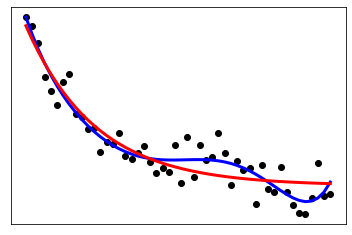

R^2 (coefficient of variation)
0.9032393937920391
Reduced chi-squared
0.7536619384528686
R^2 (coefficient of variation)
0.8619575613157339
Reduced chi-squared
0.9817074441219369


In [68]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define fitting functions
def edecay(x, a, b, c):
  return a*np.exp(-b*x) + c
def linear(x, a, b):
  return a*x + b
def quadratic(x, a, b, c):
  return a*x**2 + b*x + c
def cubic(x, a, b, c, d):
  return a*x**3 + b*x**2 + c*x + d
def sextic(x, a, b, c, d, e, f, g):
  return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

# Generate some noisy data
xdata = np.linspace(0, 4, 50)
std_err = 1.0  # standard errror in y (fixed)
y = edecay(xdata, 10, 1.3, 0.5)
#y = linear(xdata, 1, 3)
ydata = y + std_err * np.random.normal(size=len(xdata))

# Fit function to data
popt1, pcov1 = curve_fit(sextic, xdata, ydata)
perr1 = np.sqrt(np.diag(pcov1))
y1model = sextic(xdata,popt1[0],popt1[1],popt1[2],popt1[3],popt1[4],popt1[5],popt1[6])

popt2, pcov2 = curve_fit(edecay, xdata, ydata)
perr2 = np.sqrt(np.diag(pcov2))
y2model = edecay(xdata,popt2[0],popt2[1],popt2[2])

# Print parameters and standard errors
print("Parameter values 1 ")
print(popt1)
print("Parameter standard errors 1 ")
print(perr1)

print("Parameter values 2 ")
print(popt2)
print("Parameter standard errors 2")
print(perr2)


# Plot data and fitted model
plt.scatter(xdata, ydata, color="black")
plt.plot(xdata, y1model, color="blue", linewidth=3)
plt.plot(xdata, y2model, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Goodness-of-fit statistics
residuals = ydata - y1model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R^2 (coefficient of variation)")
print(r_squared)

dof = len(xdata)-len(popt1)-1
red_chi2 = ss_res/((std_err**2)*dof)

print("Reduced chi-squared")
print(red_chi2)


# Goodness-of-fit statistics
residuals = ydata - y2model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R^2 (coefficient of variation)")
print(r_squared)

dof = len(xdata)-len(popt2)-1
red_chi2 = ss_res/((std_err**2)*dof)

print("Reduced chi-squared")
print(red_chi2)


